### 1.  Import Required Libraries
Import the necessary libraries, including NumPy, pandas, matplotlib, and keras.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

### 2.  Set Random Seed
Set the random seed for reproducibility using NumPy's random.seed function.

In [58]:
# Set random seed for reproducibility
np.random.seed(42)

### 3.  Generate Dummy Data
Generate dummy data for the independent and dependent variables.

In [59]:
# Generate dummy data
n = 18  # Number of datapoints
x = np.linspace(2, 20, n)  # Independent variable
y = 0.2 * x**2 + np.random.normal(0, 2, n)  # Dependent variable with Gaussian noise

### 4.  Create a DataFrame
Create a DataFrame using pandas and rename the columns with correct units.

In [60]:
# Create a DataFrame
# Here we are creating a DataFrame using pandas. The DataFrame is a two-dimensional labeled data structure with columns of potentially different types.
# We are passing a dictionary to create the DataFrame where keys become column names and the values associated with keys become column values.
# We are also renaming the columns with correct units.

data = pd.DataFrame({'Depth (m)': x, 'Pressure (MPa)': y})

# Let's print the first few rows of the DataFrame to see if it's created correctly.
data.head()

,Depth (m),Pressure (MPa)
0,2.000000,1.793428
1,3.058824,1.594752
2,4.117647,4.686381
3,5.176471,8.405229
4,6.235294,7.307472


### 5.  Plot the Data
Plot the data using matplotlib's scatter function.

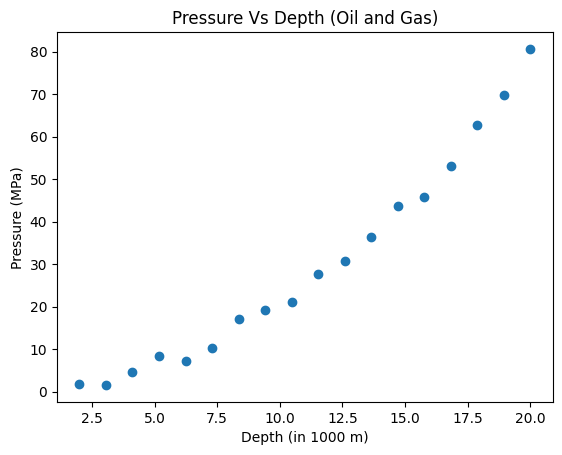

In [61]:
# Plot the data
# We are using matplotlib's scatter function to create a scatter plot of Depth vs Pressure.
# The scatter function takes x and y values as inputs and creates a scatter plot.
# We are also setting the labels for x and y axes and the title of the plot using xlabel, ylabel and title functions respectively.

plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')
plt.show()

### 6.  Define the Model
Define the model using keras's Sequential model and add layers to it.
#### TODO: Try increasing the number of neurons.

In [62]:
# Define the model
# We are using keras's Sequential model which is a linear stack of layers.
# We are adding two layers to the model using the add function.
# The first layer is a Dense layer with 16 neurons and 'relu' activation function.
# The second layer is a Dense layer with 1 neuron and 'linear' activation function.

model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

### 7.  Compile the Model
Compile the model using the Adam optimizer and mean squared error as the loss function.

In [63]:
# Define the optimizer
# We are using the Adam optimizer which is an extension to stochastic gradient descent.
# Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
# We are setting the learning rate to 0.1. The learning rate controls how quickly the model is adapted to the problem.

optimizer = Adam(learning_rate=0.1)

# Compile the model
# We are using the compile function to compile the model.
# The compile function configures the model for training.
# We are using mean squared error as the loss function and Adam optimizer.
# We are also setting the metrics that we want to calculate during training and evaluation.
# Here we are calculating mean squared error and mean absolute error.

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error', 'mean_absolute_error'])

### 8.  Fit the Model
Fit the model to the data for a specified number of epochs.

In [64]:
# Fit the model
# We are using the fit function to train the model for a fixed number of epochs (iterations on a dataset).

model.fit(data['Depth (m)'], data['Pressure (MPa)'], epochs=209, verbose=1)

Epoch 1/209
1/1 [==============================] - 0s 457ms/step - loss: 1404.7469 - mean_squared_error: 1404.7469 - mean_absolute_error: 29.2628
Epoch 2/209
1/1 [==============================] - 0s 0s/step - loss: 1038.0676 - mean_squared_error: 1038.0676 - mean_absolute_error: 24.3072
Epoch 3/209
1/1 [==============================] - 0s 0s/step - loss: 706.6013 - mean_squared_error: 706.6013 - mean_absolute_error: 19.1635
Epoch 4/209
1/1 [==============================] - 0s 0s/step - loss: 417.0074 - mean_squared_error: 417.0074 - mean_absolute_error: 14.2521
Epoch 5/209
1/1 [==============================] - 0s 16ms/step - loss: 198.5378 - mean_squared_error: 198.5378 - mean_absolute_error: 10.0626
Epoch 6/209
1/1 [==============================] - 0s 0s/step - loss: 102.2887 - mean_squared_error: 102.2887 - mean_absolute_error: 8.6910
Epoch 7/209
1/1 [==============================] - 0s 16ms/step - loss: 163.2777 - mean_squared_error: 163.2777 - mean_absolute_error: 11.8591
Epo

### 9.  Predict the Pressure Values
Use the trained model to predict the pressure values.

In [65]:
# Predict the pressure values
# We are using the predict function of the model to predict the pressure values based on the depth.
# The predict function generates output predictions for the input samples.
# We are passing the Depth as input to the predict function.

predictions = model.predict(data['Depth (m)'])

# Let's print the first few predicted pressure values to see if the prediction is working correctly.
print(predictions[:5])

1/1 [==============================] - 0s 105ms/step
[[-1.5325587]
 [-0.5069463]
 [ 1.983993 ]
 [ 5.33362  ]
 [ 8.683248 ]]


### 10.  Plot the Regression Curve with the Data
Plot the regression curve with the data using matplotlib's plot function.

1/1 [==============================] - 0s 83ms/step


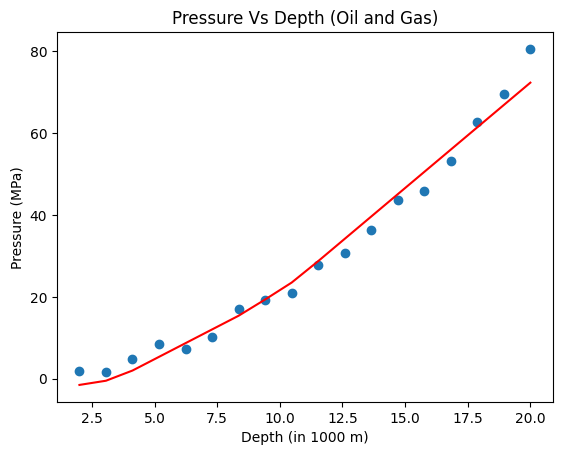

In [66]:
# Predict the pressure values
predictions = model.predict(data['Depth (m)'])

# Plot the regression curve with the data
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.plot(data['Depth (m)'], predictions, color='red')
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')
plt.show()